In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/placement-csv/placement.csv


# #Let's have a look on Gradient Descent 
> This is notebook regarding Gradient Descent and it's type with example code and how can we make our own class which work exactly like sgdregressor of sklearn.
>
> if you like this notebook than please do upvote.
>
> if not than please tell what goes wrong in comment.

# Gradient Descent : 

*Gradient Descent is a first-order, iterative optimization algorithm used to find the local minimum of a differentiable function.
The idea is to take repeated small steps in the opposite direction of the gradient because that’s the direction of steepest descent (where the function decreases the fastest).*

**Let's have real world example:**

Imagine you’re standing on a hill in thick fog.
You can’t see far, but you want to reach the lowest point (the valley).

What do you do?

You feel the ground around your feet →
you check which direction slopes downward the most →
and you take a small step in that direction.

Then you repeat, again and again, until you reach the lowest place.

That’s literally gradient descent.

You don’t jump, you don’t guess.

You take tiny, smart steps.

**✨ Why we use Gradient Descent in ML?**

Because in ML, we have some “error function” (loss) that we want to minimize.


> Examples:
> 
> Predicting house price?

>  → Minimize prediction errorTraining a model?

> → Minimize lossFitting a line?

>  → Minimize distance from points


Gradient Descent helps us find the best parameters where error is lowest.

*We also find this best parameters by ordinary least square(OLS) where we use direct formula.*

**Then why we need Gradient Descent ?🤔**

*OLS works great on small/medium datasets. But for very large datasets (millions of rows, many features), computing (XᵀX)⁻¹ (matrix inversion) becomes slow and memory heavy. That's where Gradient Descent is better, it handles big data step by step.*

**💡 Intuition With a Simple Math Example**

Suppose we want to minimize this:

*f(x)=x^2*

Plot it in your mind → it’s a U-shaped curve.(parabola)

The lowest point is at x = 0, but pretend we don’t know that.
Gradient descent will take steps toward 0 automatically.

**🧮 Gradient Descent Steps (clear and simple)**

1.Start with a random value of x
ex: x = 5

2.Compute the gradient

For *f(x)=x² → derivative = 2x*

3.Update x using:

*x=x−α⋅(2x)*

where α = learning rate (step size)

4.Repeat until x stops changing much

*Now See Code examples:*

# Visulisation How Gradient Descent Works

In [2]:

import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/kaggle/input/placement-csv/placement.csv')

In [4]:
X=df.drop(columns=['package'])
y=df['package']

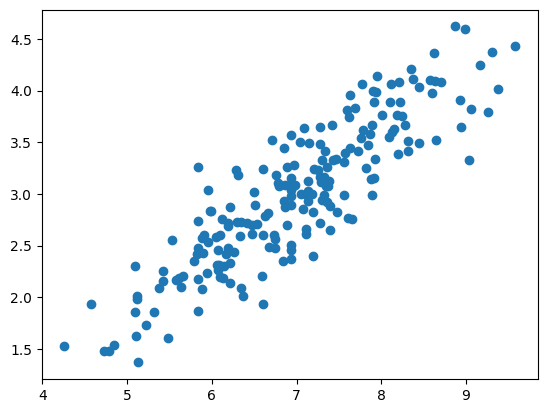

In [5]:
plt.scatter(X,y)
plt.show()

In [6]:
# Let's apply OLS
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [7]:
reg.coef_ ,reg.intercept_

(array([0.56959129]), -0.9856779462557332)

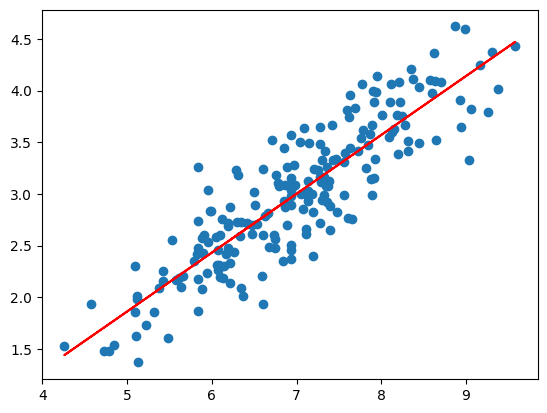

In [8]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red')
plt.show()

In [9]:
# Lets apply Gradient Descent assuming slope is constant m = 0.569
# and let's assume the starting value for intercept b = 0
y_pred = ((0.569 * X) + 0).values.reshape(200)
# y_pred

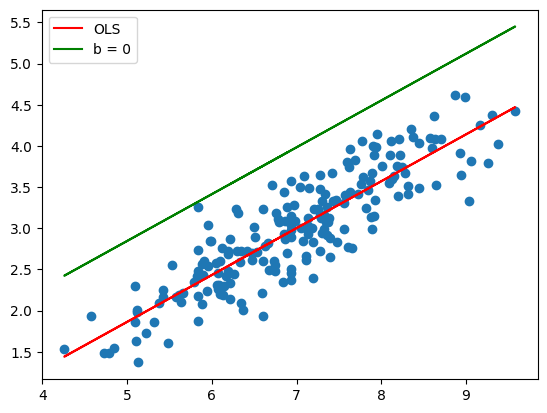

In [10]:
# plt.figure(figsize=(12,10))
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='green',label='b = 0')
plt.legend()
plt.show()

In [11]:
m = 0.569
b = 0

loss_slope = -2 * np.sum(y - m*X.values.ravel() - b)
loss_slope

392.6177999999999

In [12]:
# Lets take learning rate = 0.001
lr = 0.001

step_size = loss_slope*lr
step_size

0.3926177999999999

In [13]:
# Calculating the new intercept
b = b - step_size
b

-0.3926177999999999

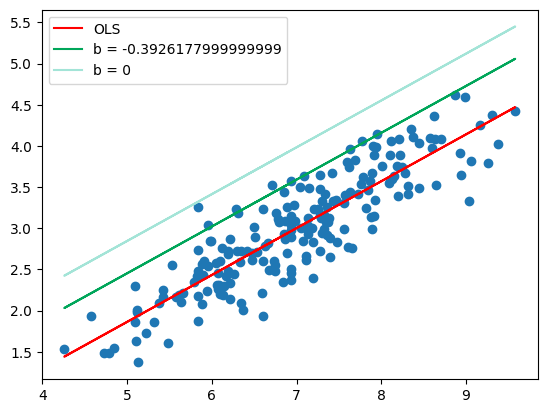

In [14]:
y_pred1 = ((0.569 * X) + b).values.reshape(200)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred1,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

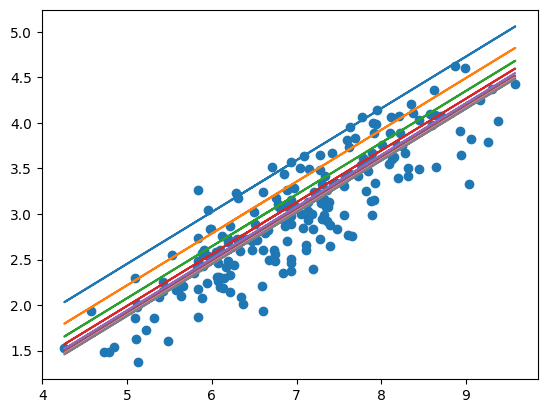

In [15]:
# Let's make loop so, that we don't have to do iteration saperately
b = 0
m = 0.569
lr = 0.001

epochs = 8

for i in range(epochs):
  loss_slope = -2 * np.sum(y - m*X.values.ravel() - b)
  b = b - (lr * loss_slope)

  y_pred = (m * X + b).values.reshape(df.shape[0])

  plt.plot(X,y_pred) 

plt.scatter(X,y)
plt.show()

***Let's make code from scratch***

In [16]:
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

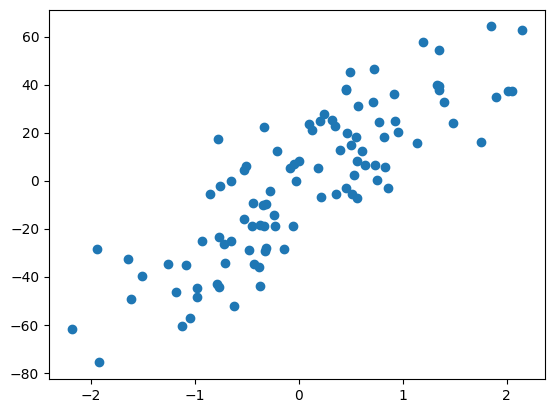

In [17]:
# make our dataset
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)
plt.scatter(X,y)
plt.show()

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                 random_state=2)
lr = LinearRegression()

lr.fit(X_train,y_train)

print(lr.coef_)
print(lr.intercept_)

y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

[28.12597332]
-2.2710144261783825


0.6345158782661012

In [19]:
# Now make our class and check it:
class GDregressor():

    def __init__(self,learning_rate,epochs):
        self.m=100
        self.b=-120
        self.lr=learning_rate
        self.epochs = epochs

    def fit(self,X,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)
        
    def predict(self,X):
        return self.m * X + self.b        
        

In [20]:
gd= GDregressor(0.001,100)

In [21]:
gd.fit(X_train,y_train)

28.125986180062693 -2.2710234077993587


In [22]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.634515826773629

# Type of Gradient Descent :
*Gradient Descent has 3 main types — and honestly, they're just different ways of feeding data to the algorithm.*

**1. BATCH GRADIENT DESCENT :**

*Takes ALL data at once to compute the gradient.*

>Like doing your entire homework in one go — no breaks, no samples, everything at once.

*✔️ Pros*

* Very accurate updates

* Smooth descent (no zig-zag)

*❌ Cons*

* Slow when dataset is huge

* Needs big memory

*🧠 When to use*

* When dataset is small or medium and fits easily in RAM.

> **Above coded examples are of this type but let's have one more example below with more columns in it and we are gonna code from scratch**

In [23]:
from sklearn.datasets import load_diabetes

In [24]:
X,y=load_diabetes(return_X_y = True)

In [25]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [26]:
X_train_,X_test_,y_train_,y_test_ = train_test_split(X,y,test_size=0.2,
                                                 random_state=2)

In [27]:
lr_ = LinearRegression()

lr_.fit(X_train_,y_train_)

print(lr_.coef_)
print(lr_.intercept_)

y_pred_ = lr_.predict(X_test_)
r2_score(y_test_,y_pred_)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167


0.4399338661568969

In [28]:
class Gdregressor:
    def __init__(self,learning_rate=0.01,epochs=100):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs=epochs

    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_=np.ones(X_train.shape[1])

        for i in range(self.epochs):
            y_hat = np.dot(X_train,self.coef_)+ self.intercept_
            intercept_der = -2 * np.mean(y_train - y_hat)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)
            
            coef_der = -2 * np.dot((y_train - y_hat),X_train)/X_train.shape[0]
            self.coef_ = self.coef_ - (self.lr * coef_der)
        
        print(self.intercept_,self.coef_)
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_            
            

In [29]:
gdr= Gdregressor(epochs=1000,learning_rate=0.5)

In [30]:
gdr.fit(X_train_,y_train_)

152.01351687661833 [  14.38990585 -173.7235727   491.54898524  323.91524824  -39.32648042
 -116.01061213 -194.04077415  103.38135565  451.63448787   97.57218278]


In [31]:
y_predict_ = gdr.predict(X_test_)

In [32]:
r2 = r2_score(y_test_,y_predict_)
r2

0.4534503034722803

**2. STOCHASTIC GRADIENT DESCENT :**

*Takes ONE data point at a time.*


> Imagine checking your weight every single minute — it jumps up and down, but eventually trends down.SGD is like that:noisy, fast, zig-zag path, but reaches minimum quickly.


*✔️ Pros*

* Fastest

* Works well with huge datasets

* Good for online learning (data comes in streams)

*❌ Cons*

* Lots of randomness

* Loss jumps up and down

*🧠 When to use*

* When dataset is very large (like millions of rows).

In [33]:
from sklearn.linear_model import SGDRegressor

In [34]:
sgd = SGDRegressor(max_iter=100 ,learning_rate='constant',eta0=0.01)

In [35]:
sgd.fit(X_train_,y_train_)

SGDRegressor(learning_rate='constant', max_iter=100)

In [36]:
y_pre = sgd.predict(X_test_)

In [37]:
r2_score(y_test_,y_pre)

0.4309371727080581

In [38]:
class SGDregressor():
    def __init__(self,learning_rate = 0.01,epochs=100):
        self.intercept_ = None
        self.coef_ =None
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,X_train,y_train):
        self.intercept_=0
        self.coef_= np.ones(X_train.shape[1])

        for i in range(self.epochs):
            for j in range(X_train.shape[0]):
                idx= np.random.randint(0,X_train.shape[0])
                y_hat = np.dot(X_train[idx],self.coef_) + self.intercept_
                
                intercept_der = -2 * (y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)
                
                coef_der = -2 * np.dot((y_train[idx] - y_hat),X_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)
        
        print(self.intercept_,self.coef_)
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_                
        

In [39]:
sgd = SGDregressor(learning_rate = 0.01,epochs=40)

In [40]:
sgd.fit(X_train_,y_train_)

155.81229581881973 [  63.12639899  -51.17968751  319.2366012   232.6758491    26.25040676
  -11.26339938 -162.56018998  129.01826647  289.8903029   118.73778236]


In [41]:
y_pre = sgd.predict(X_test_)
r2_score(y_test_,y_pre)

0.4202636851181092

**3. MINI-BATCH GRADIENT DESCENT :**

*Takes small groups (batches) of the data, like 32, 64, 128 samples.*

>Like studying in short 30-minute chunks instead of whole day (batch) or only 1 minute (SGD).
It’s the perfect middle ground.

*✔️ Pros*

* Faster than batch

* Smoother than SGD

* Best for deep learning

* GPU friendly

*❌ Cons*

* Need to choose the right batch size

*🧠 When to use*

* Any dataset from medium → large.
  
  > **We can't directly use mini batch in sklearn **

In [42]:
import random

In [43]:
sgd = SGDRegressor(learning_rate='constant',eta0=0.1)

batch_size = 35

for i in range(100):
    
    idx = random.sample(range(X_train_.shape[0]),batch_size)
    sgd.partial_fit(X_train_[idx],y_train_[idx])

In [44]:
y_pre = sgd.predict(X_test_)
r2_score(y_test_,y_pre)

0.3962906804872748

In [45]:
class MBGDregressor():
    def __init__(self,Batch_size,learning_rate=0.01,epochs =100):
        self.intercept_ = None
        self.coef_ = None
        self.lr=learning_rate
        self.epochs=epochs
        self.bs =  Batch_size

    def fit(self,X_train,y_train):
        self.intercept_ =0
        self.coef_ = np.ones(X_train.shape[1])
        for i in range(self.epochs):
            for j in range(int(X_train.shape[0]/self.bs)):
                idx= random.sample(range(X_train.shape[0]),self.bs)
                y_hat = np.dot(X_train[idx],self.coef_) + self.intercept_
                intercept_der = -2 * np.mean(y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)

                coef_der = -2 * np.dot((y_train[idx] - y_hat),X_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)
        
        print(self.intercept_,self.coef_)
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [46]:
mbr = MBGDregressor(Batch_size=int(X_train.shape[0]/50),learning_rate=0.01,epochs=100)
mbr.fit(X_train_,y_train_)

160.49243457115494 [  31.9244563  -129.11773688  448.26939289  306.34828218  -24.02877692
  -93.30846897 -193.41871724  116.00899898  408.10403577  115.76099889]


In [47]:
y_pred  = mbr.predict(X_test_)

In [48]:
r2_score(y_test_,y_pred)

0.4392738023794256

For animated visulization you can click [here](https://www.kaggle.com/code/sharmagayatri/gradient-descent-visualization)